# This script processes the o4 minradius results for best level-minRadius configuration for each cloud

1. Compile o3memo with:
```
make bin/o3memo 
```
2. Run the benchmarking script
```
cd scripts
python3 run_par_speedup.py
```
3. The output that we will process is o4_speedup_coffee.csv (renamed from o4_speedup.csv)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys
from statistics import mean

def tokenize(filename):
    results ={}
    with open(filename) as f:
        next(f) # skip header
        for line in f:
            tokens = line.split()
            name=tokens[1].split("/")[3][:-5]
            nth=int(tokens[2])
            level=int(tokens[5])
            if name not in results:
                results[name]={}
            if level not in results[name]:
                results[name][level]={}
            results[name][level][nth]=[float(tokens[6])] # tree construction time
            results[name][level][nth].append(float(tokens[7])) # owm time
            results[name][level][nth].append(float(tokens[6])+float(tokens[7])) # total time
            results[name][level][nth].append(float(tokens[8])) # accuracy
    return results


res=tokenize("o4_speedup_coffee.csv") # optim3 without with memo A and B


[5, 5, 4, 4]
Phase: qtree speedup for each cloud and best level for each cloud: ['Alcoy', 'Arzua', 'BrionF', 'BrionU']
[1.         1.85804224 2.82060633 4.05220999 5.24363951]
[1.         1.96333229 2.81502233 4.09353752 5.3076266 ]
[1.         1.90433009 2.74540963 3.81158168 4.96847766]
[1.         1.96119378 2.64825386 3.86784042 4.37991143]
Phase: owm speedup for each cloud and best level for each cloud: ['Alcoy', 'Arzua', 'BrionF', 'BrionU']
[1.         1.87031446 2.78816904 4.07144468 5.31537488]
[1.         1.96149585 2.8189004  4.11288351 5.28735546]
[1.         1.73558965 2.42167577 2.9828405  3.03406608]
[1.         1.77306361 2.40606819 2.85340408 2.76368415]
Phase: total speedup for each cloud and best level for each cloud: ['Alcoy', 'Arzua', 'BrionF', 'BrionU']
[1.         1.86563412 2.80040128 4.06411739 5.28789801]
[1.         1.96250887 2.81675896 4.10218481 5.29852296]
[1.         1.87132692 2.68041053 3.62869854 4.45342473]
[1.         1.92386265 2.6003863  3.63171832

<Figure size 640x480 with 0 Axes>

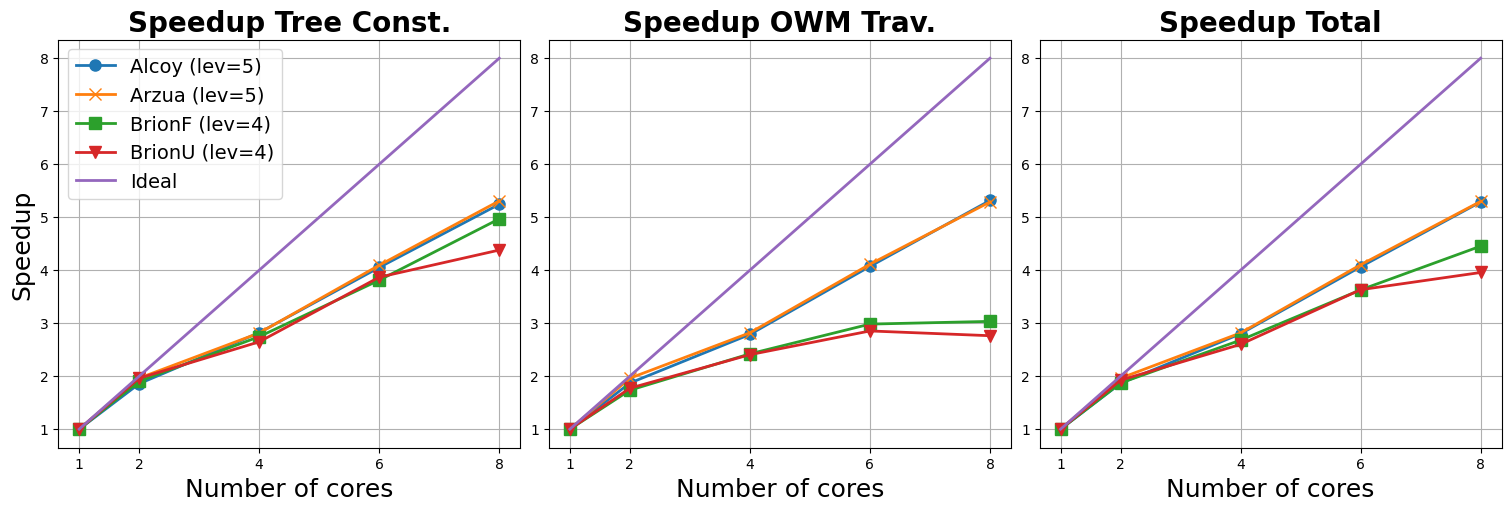

In [5]:
#Configuration variables
def plot_res(res):
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8

    fig = plt.figure()

    marks=['o-','x-','s-','v-','+-']
    bestlevel=[min(res[i], key=lambda x: res[i][x][8][2]) for i in res]
    print(bestlevel)
    numthreads=list(res['Alcoy'][bestlevel[0]].keys())
    labels=['Tree Const.','OWM Trav.','Total']

    fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(15, 5), constrained_layout=True)
    sizes=[i+" (lev="+str(j)+")" for i,j in zip(res,bestlevel)]
    sizes.append('Ideal')

    for phase,subfig in zip(['qtree','owm','total'],range(3)):
        print("Phase: "+phase+ " speedup for each cloud and best level for each cloud: "+str(list(res.keys())))
        for (i,z,lev) in zip(res,marks,bestlevel):
            print(np.array([res[i][lev][1][subfig]/res[i][lev][j][subfig] for j in numthreads]))
            axs[subfig].plot(np.array(numthreads), np.array([res[i][lev][1][subfig]/res[i][lev][j][subfig] for j in numthreads]), z, linewidth=linew, markersize=markers)
        axs[subfig].plot(np.array(numthreads), np.array(numthreads), '-', linewidth=linew, markersize=markers)
        axs[subfig].set_title('Speedup '+labels[subfig],  fontweight='bold', fontsize=titlefs)
        axs[subfig].set_xlabel('Number of cores', fontsize=xlabelfs)
        axs[subfig].set_xticks(numthreads,fontsize=xticksfs)
        axs[subfig].grid()

    axs[0].set_ylabel('Speedup', fontsize=ylabelfs)
    axs[0].legend(sizes,loc='best', fontsize= legendfs)
#    plt.yticks(fontsize=yticksfs)

    plt.show()

plot_res(res)

In [49]:
pp = PdfPages("Speedup-partree.pdf")
pp.savefig(fig)
pp.close()